# MSDS 593 Homework 2
**By:** Flora Chen, Jiahui Jin

**Date:** Sep 7, 2020

In [1]:
# import all required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors 
%config InlineBackend.figure_format = 'retina'
%matplotlib inline


# Q1 redesign bubble chart

In [45]:
data = {'company': ['Walmart', 'Sinopec Group','State Grid','China National Petroleum','Royal Dutch Shell', 'Saudi Aramco','Volkswagen','BP  ','Amazon','Toyota Motor'], 
'revenue': [523964, 407009, 383906, 379130, 352106, 329784, 282760, 282616, 280522, 275288], 
'profit': [14881.00, 6793.20, 7970.00, 4443.20, 15842.00, 88210.90, 15542.00, 4026.00, 11588.00, 19096.20]}

In [54]:
top10 = pd.DataFrame(data)
top10['ratio'] = round((top10.profit-top10.revenue)/top10.revenue,3) * 100
top10 = top10.sort_values(by = ['ratio'], ascending=True)
top10=top10.reset_index()

top10

,index,company,revenue,profit,ratio
0,3,China National Petroleum,379130,4443.2,-98.8
1,7,BP,282616,4026.0,-98.6
2,1,Sinopec Group,407009,6793.2,-98.3
3,2,State Grid,383906,7970.0,-97.9
4,0,Walmart,523964,14881.0,-97.2
5,8,Amazon,280522,11588.0,-95.9
6,4,Royal Dutch Shell,352106,15842.0,-95.5
7,6,Volkswagen,282760,15542.0,-94.5
8,9,Toyota Motor,275288,19096.2,-93.1
9,5,Saudi Aramco,329784,88210.9,-73.3


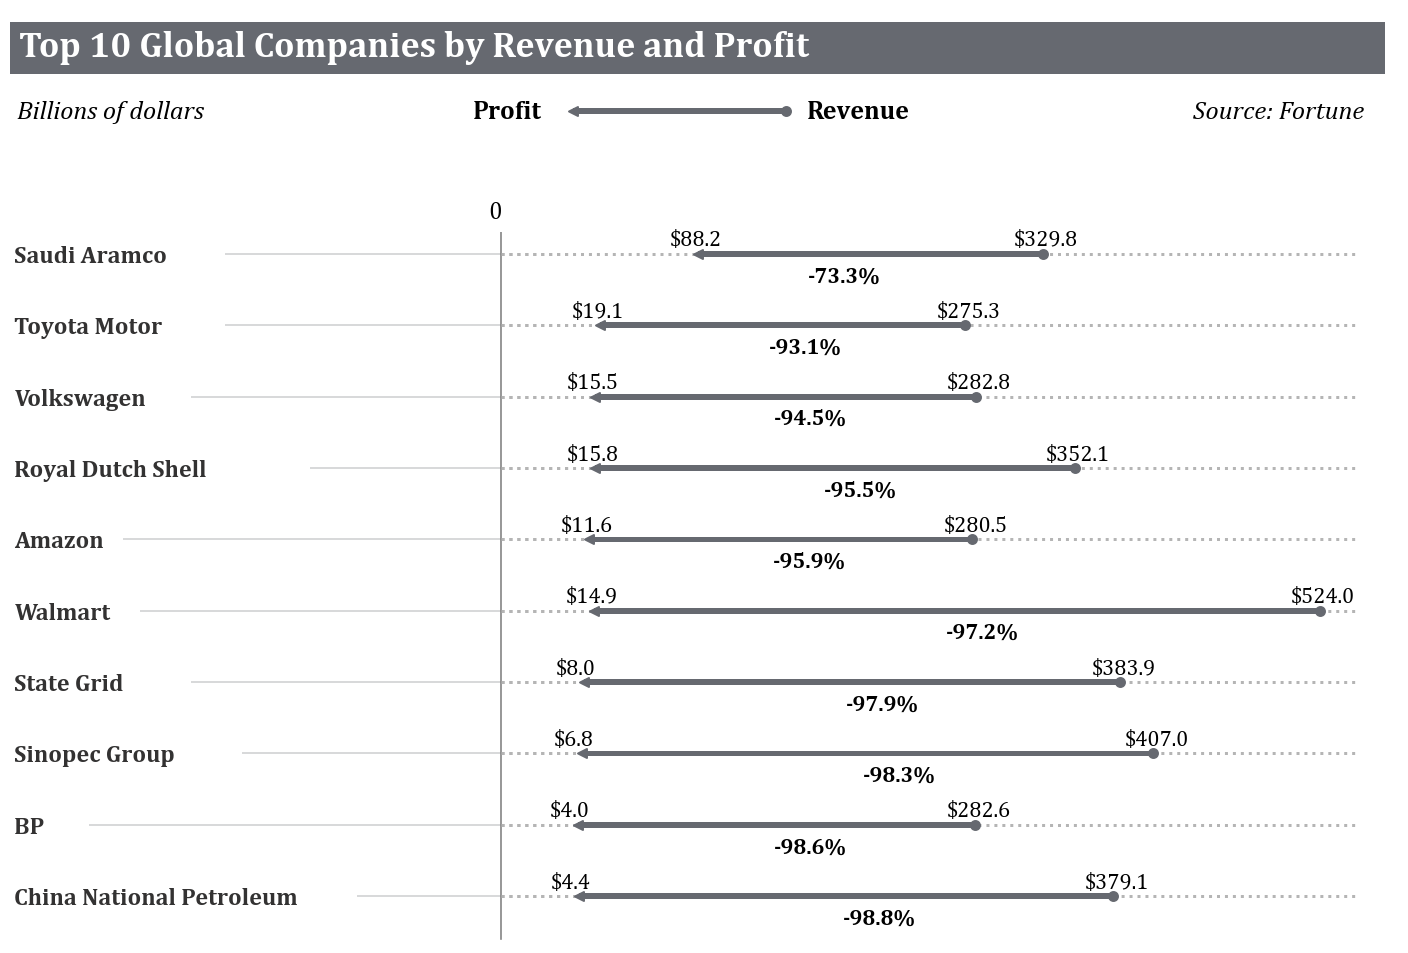

In [94]:
fig, ax = plt.subplots(1,1, figsize=(8
                                     ,8))
# turn latex off
plt.rc('text', usetex=False)



x = np.arange(len(top10.company))
rev = round(top10.revenue / 1000,1)
prof = round(top10.profit / 1000, 1)

rev_color = '#666970'
prof_color = 'white'
axis_color = '#b5b5b5'

line_width = 0.08

revenue = ax.barh(x, rev, color=rev_color, height=line_width, label='Revenue', zorder=1)
profit = ax.barh(x, prof, color=prof_color, height=line_width, label='Profit', zorder=2)
ax.hlines(x, xmin=-50, xmax=prof, color=axis_color, linestyles='dotted', zorder=3)
ax.hlines(x, xmin=-50, xmax=max(rev)*1.05, color=axis_color, linestyles='dotted', zorder=1)

# plot legend arrow
ax.scatter(0, 11, color=rev_color, s=20, zorder=10, marker='<')
ax.scatter(150, 11, color=rev_color, s=20, zorder=10)
ax.barh([11], [150], color=rev_color, height=line_width, label='Revenue', zorder=1)




ax.scatter(rev, x, color=rev_color, s=20, zorder=10)
ax.scatter(prof, x, color=rev_color, marker='<',  s=20, zorder=15)

# hide all axis/spines
# ax.spines['left'].set_visible(False)
ax.spines['left'].set_color('grey')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)

# set x axis cutoff point
ax.set_xlim(-50,max(rev)*1.1)



# adjust y-axis size and positioning
ax.set_yticks(x)
ax.set_yticklabels(top10.company, 
                    fontsize=12,
                    color='#333232',
                    ha='left',
                    fontdict={'fontweight': 'bold',}
                
                     )
# left align y-tick labels
yax = ax.get_yaxis()
pad = len(max(top10.company, key=len)) # find max width of the label on the major ticks
yax.set_tick_params(pad=pad*10)


# set varying ytick lengths to labels
yticklines = [tickline for i, tickline in enumerate(yax.get_ticklines()) if i % 2 == 0] # array of y major ticklines
yticklabel_length = [ len(label.get_text()) for label in yax.get_ticklabels()] # find all tick label length

# pad = max(T.label.get_window_extent(renderer=None).width*1.2 for T in yax.majorTicks) # find max tick label length


for i, tickline in enumerate(yticklines):
    if yticklabel_length[i] == pad:
        tickline.set_markersize(pad * 10 - yticklabel_length[i]*7)

    else:
        tickline.set_markersize(pad * 10 - yticklabel_length[i]*8.5)
        
ax.tick_params(axis='y', which='both', color='#cfd0d1')

# create function to add bar value labels
def autolabel(rects, values, color, middle=False):
    """
    Attach a text label above each bar displaying its height
    """
    cnt = 0
    for i, rect in enumerate(reversed(rects)):
        width = rect.get_width()
        height = rect.get_height()   
        if middle:
            ax.text(width - width/2, rect.get_y()-0.5 + 0.145, str(round(values[i],1)) + '%', color=color, fontsize=11, \
                    fontdict={'fontweight': 'bold'})
        else:
            ax.text(width - 20, rect.get_y() + 0.15, '$'+ str(values[i]), color=color, fontsize=11)
# add bar value labels        
autolabel(revenue, list(rev[::-1]), 'black') 
autolabel(revenue, list(top10.ratio[::-1]), 'black', middle=True) 

autolabel(profit, list(prof[::-1]), 'black')

# adjust tick lines
ax.yaxis.get_ticklines()

# set title 
title = ax.set_title('Top 10 Global Companies by Revenue and Profit' + ' '* 72, loc='left', fontsize=18, color='white',fontdict={'fontweight':'bold'})
title.set_position([-0.54, 1.11])
title.set_backgroundcolor(rev_color)


# set legend labels
ax.text(-62,9.5, '    \n'*7 + ' 0', fontsize=12, bbox=dict(facecolor='white', edgecolor='white', pad=4))
ax.text(-390,10.9, 'Billions of dollars', fontsize=13, fontdict={'fontstyle':'italic'})
ax.text(435,10.9, 'Source: Fortune', fontsize=13, fontdict={'fontstyle':'italic'})
ax.text(-70,10.9, 'Profit', fontsize=13, fontdict={'fontweight':'bold'}, zorder=3)
ax.text(164,10.9, 'Revenue', fontsize=13, fontdict={'fontweight':'bold'}, zorder=3)




# ax.text(-100,10, 'Profits <-* Revenue', fontsize=13, fontdict={'fontfamily':'italic'})
 
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Cambria'
# plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.show()


# Q2 chart changes
* simplified x-axis labels, and rotated to horizontal alignment
* simplified and left aligned title
* removed line markers
* removed data point labels 
* removed gridlines  
* removed top and right spines
* removed backgrounud color
* labeled lines with corresponding color (instead of using legend)



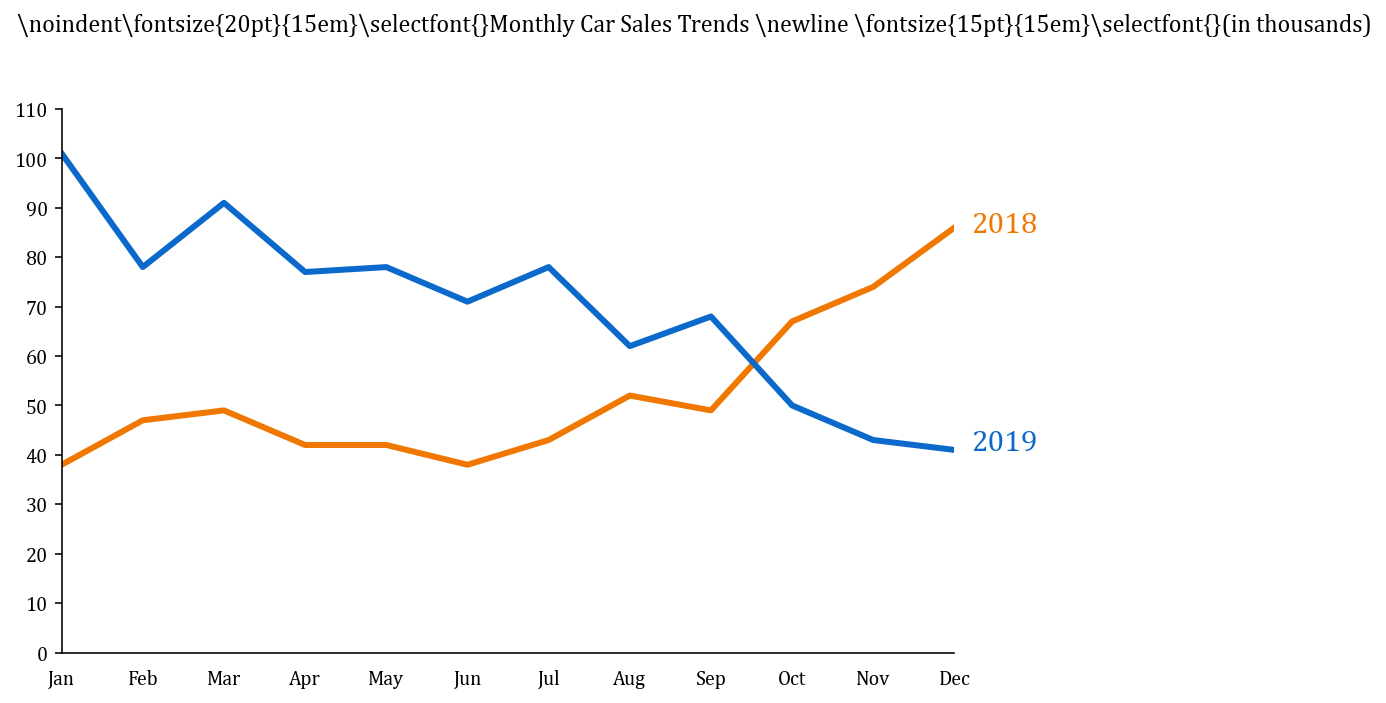

In [89]:
fig, ax = plt.subplots(1,1, figsize=(8,5))

sales = {'2019':[101, 78, 91, 77, 78, 71, 78, 62, 68, 50, 43, 41], 
        '2018':np.array([38, 47, 49, 42, 42, 38, 43, 52, 49, 67, 74, 86])}
months = ['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

a = ax.plot(months, sales['2018'], lw=3, color='#f07800')
ax.plot(months, sales['2019'], lw=3, color='#0c69cc')

# add right margin white space for line labels
x0, x1, y0, y1 = ax.axis()
ax.axis((x0, x1+1.3, y0, y1))

# add line labels
ax.text(11.2,85,'2018', color='#f07800', fontsize=15)
ax.text(11.2,41,'2019', color='#0c69cc', fontsize=15)

# adjust axis cutoff points
ax.set_xlim(0, 11)
ax.set_ylim(0, 110)
ax.set_yticks(np.linspace(0,110, 12))


# hide x ticks
ax.tick_params(axis='x', length=5, color='white')

# hide right and top chart borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# set title
plt.rc('text', usetex=True)
plt.rc('font', **{'family': 'sans-serif', 'sans-serif':'Arial'})


ax.set_title(r'\noindent\fontsize{20pt}{15em}\selectfont{}Monthly Car Sales Trends \newline \fontsize{15pt}{15em}\selectfont{}(in thousands)', \
             loc='left', y=1.12, x=-0.05)

plt.show()

# Question 3

### Fig 2
* Proximity: line labels are positioned near their corresponding line.
* Similarity: three colors are assigned to three seperate lines; their label colors also matches.
* Continuity: smooth lines are used for easier digestion of trends.

### Fig 3
Chart 1: 
* Proximity: horizontal bands naturally seperate age groups
* Similarity: expected death deviation % is encoded to a color spectrum. The same spectrum applies across seperate age bands, enabling easier comparisons. 
* Closure: each year's flu season is enclosed in a box, highlighting the data and making it easier to spot. 

Chart 2:
* Proximity: labels are placed near their designated lines
* Similarity: importance of lines are distinguished by color variations; more important lines take on a darker color.
* Continuity: smooth lines are used for easier digestion of trends. 


## Usage of contrast
* fig 1, uses contrasting colors to equally highlight the three lines
* fig 2 chart 1 uses darker red colors, contrased by lighter blue colors, to accentuate larger death deviations.
* fig 2, chart 2, uses darker colors to single out attention on 1-2 lines relative to a set of multiple lines.